In [5]:
#pip install opencv-python

In [2]:
import numpy as np
import torch as tc
import matplotlib.pyplot as plt
import cv2

In [3]:
# import opencv 
import cv2 

# Load the input image 
#image = cv2.imread('0b791b58a139a9172c7db2ea8dfe727a.jpg') - old image as an example
image = cv2.imread('fozzybear.jpg')

# Use the cvtColor() function to grayscale the image 
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
print(gray_image.shape)

(678, 664)


In [ ]:
# plt the picture
fig = plt.figure(dpi=300, figsize=(15,10))
plt.imshow(gray_image,cmap='gray')
plt.axis("off")
plt.title("Original")
plt.show()

In [5]:
gauss_noise = np.zeros_like(gray_image)
cv2.randn(gauss_noise, 128, 20) # mean of 128, sd 20
gauss_noise = (gauss_noise * 0.5).astype(np.uint8)
print(gauss_noise)

[[64 65 57 ... 72 58 73]
 [60 57 68 ... 59 71 52]
 [69 71 61 ... 62 72 72]
 ...
 [73 61 62 ... 70 73 66]
 [68 75 52 ... 63 80 50]
 [55 56 70 ... 79 69 56]]


In [6]:
gn_img = cv2.add(gray_image, gauss_noise)

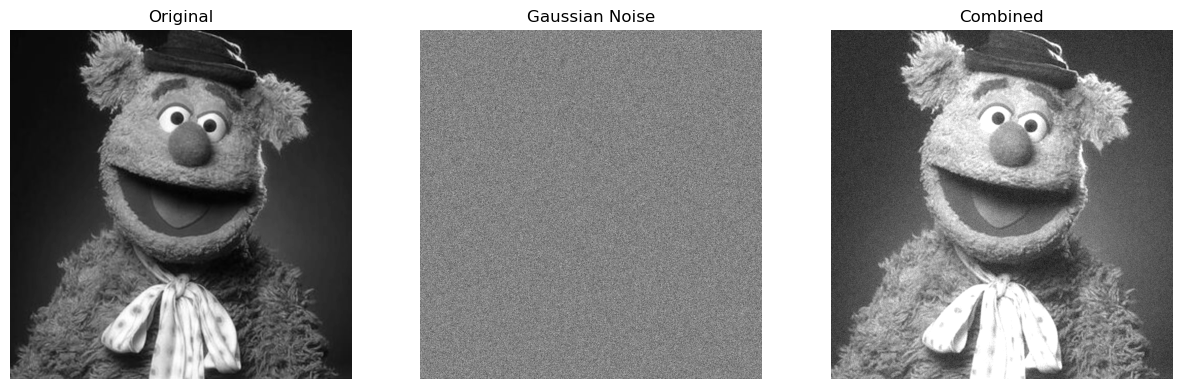

In [7]:
# Create a figure and a grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Plotting the original image
axs[0].imshow(gray_image, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original')

# Plotting the Gaussian noise
axs[1].imshow(gauss_noise, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Gaussian Noise')

# Plotting the image with Gaussian noise added
axs[2].imshow(gn_img, cmap='gray')
axs[2].axis('off')
axs[2].set_title('Combined')

# Show the figure
plt.show()


In [8]:
x, _, _, _ = np.linalg.lstsq(gn_img, gray_image, rcond=None) # using linalg package for least squares, but can change to compare QR and least Squares
reworked = np.dot(gn_img, x)

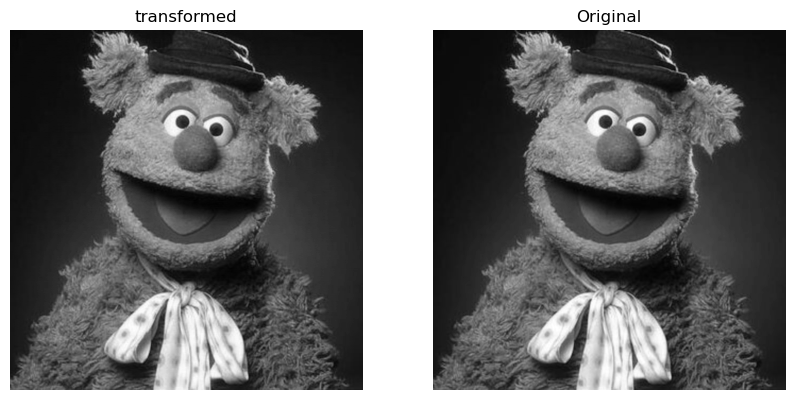

In [9]:
# Create a figure and a grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 12))  # 1 row, 3 columns

# Plotting the original image
axs[0].imshow(reworked, cmap='gray')
axs[0].axis('off')
axs[0].set_title('transformed')

axs[1].imshow(gray_image,cmap='gray')
axs[1].axis("off")
axs[1].set_title("Original")
plt.show()

## Experimental Stuff for CP1
Trying to add a blurring effect to the original photo

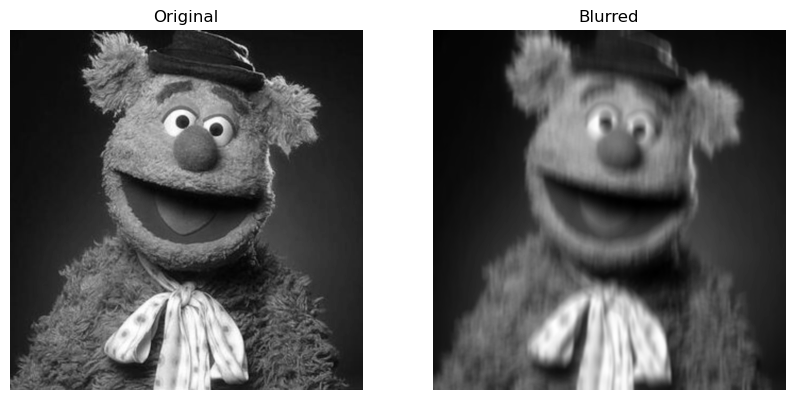

In [10]:
# Apply Gaussian blur
#blurred_image = cv2.GaussianBlur(image, (15, 15), 0)
blurred_image = cv2.blur(image, (5,25))
gray_blurred_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY) 

# showing comparison
fig, axs = plt.subplots(1, 2, figsize=(10, 12))

# Plotting the original gray vs blurred gray image
axs[0].imshow(gray_image , cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original')

axs[1].imshow(gray_blurred_image,cmap='gray')
axs[1].axis("off")
axs[1].set_title("Blurred")
plt.show()

In [ ]:
## Unblurring image using built-in package
x, _, _, _ = np.linalg.lstsq(gray_blurred_image, gray_image, rcond=None) # using linalg package for least squares, but can change to compare QR and least Squares
reworked = np.dot(gray_blurred_image, x)
print(reworked)
print(gray_image)

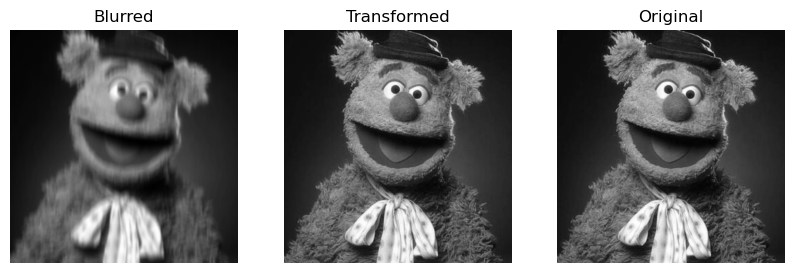

In [18]:
# Create a figure and a grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 12))  # 1 row, 3 columns

# Plotting the original image
axs[0].imshow(gray_blurred_image,cmap='gray')
axs[0].axis("off")
axs[0].set_title("Blurred")

axs[1].imshow(reworked, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Transformed')

axs[2].imshow(gray_image, cmap ='gray')
axs[2].axis("off")
axs[2].set_title("Original")
plt.show()